# Trabalho Prático 4 - Evolução diferencial
## Computação Evolucionária - UFMG - 2021/1
### Alunos:
 * Jesimon Barreto
 * Daniel Piçarro

In [1]:
import numpy as np
import random
import copy
import math
import matplotlib.pyplot as plt

## Funções de suporte

In [2]:
# Gerando pop. inicial

# N -> tamanho da pop. (TEM QUE SER MAIOR QUE 3)
# n -> quantidade de variáveis
# low -> limite inferior da distribuição uniforme
# high -> limite superior da distribuição uniforme
def init_pop(N:int, n:int, low:int, high:int):
    pop = np.zeros((1, n, N))
    print(pop.shape)
    for i in range (n):
        s = np.random.uniform(low, high, N)
        pop[0][i] = s
    return pop

# recebe a pop. e retorna 3 indivíduos (r1, r2, r3) -> cada um é um vetor unidimensional
def select_three(pop):
    rand_idxs = random.sample(range(0, pop.shape[1]), 3)
    return pop[:,rand_idxs[0]], pop[:,rand_idxs[1]], pop[:,rand_idxs[2]]

# recebe camada atual, retorna:
#    - melhor solução da camada
#    - score da melhor solução da camada
#    - score médio da camada
def get_best_in_layer(t_pop, function='p'):    
    best_sol = t_pop[:,0]    
    evals = []
    for k in range(t_pop.shape[1]):
        current_sol = t_pop[:,k]
        current_score = evaluate(current_sol, function)
        evals.append(current_score)
        best_sol_score = evaluate(best_sol, function)
        if current_score <= best_sol_score:
            best_sol = current_sol
    layer_avg = np.mean(evals)
    return best_sol, best_sol_score, layer_avg

def plot(n_iter, fitness_avg, best_of_generation):
    # Plotting both the curves simultaneously
    X = range(n_iter)
    plt.plot(X, fitness_avg, color='r', label='Fitness Average')
    plt.plot(X, best_of_generation, color='g', label='Best of each gen.')

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Evolution")

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend()

    # To load the display window
    plt.show()

## Funções objetivo

In [3]:
def peaks(x):
    return 3*(1-x[0])**2*math.exp(-(x[0]**2)-(x[1]+1)**2)-10*(x[0]/5-x[0]**3-x[1]**5)*math.exp(-x[0]**2-x[1]**2)-1/3*math.exp(-(x[0]+1)**2-x[1]**2)

def rastrigin(x):
    x = np.array(x)
    x = x.reshape(1, -1).T
    Q = np.eye(len(x)) 
    X = Q.dot(x) 
    n = len(X)
    F = 0
    
    for i in range(n):
        F = F + X[i]**2 - 10*np.cos(2*np.pi*X[i])
        
    return F[0]

def evaluate(v, param = 'p'):
    if param == 'p':
        return peaks(v)
    elif param == 'r':
        return rastrigin(v)
    else:
        return 0

In [4]:
evaluate([0,0], 'r')

-20.0

## Evolução diferencial 

In [5]:
def differential_evolution(N=50, n=2, low=-2, high=2, C=0.6, F=0.7, function='p', num_iter=100):

    # inicializa pop.
    pop = init_pop(N,n,low,high)

    n_iter = 0

    fitness_avg = []
    best_of_generation = []

    # enquanto crit. parada não satisfeito
    while n_iter <= num_iter:

        # pega "camada mais recente" da pop.
        # t_pop = copy.copy(pop[-1])
        t_pop = pop[-1]

        # "mi" descrito no enunciado, solução mutante ("mais uma camada do bolo")
        solucao_mutante = np.zeros((n, N))

        new_layer = np.zeros((n, N))

        # iterando entre indivíduos
        for i in range(N):
            r1, r2, r3 = select_three(t_pop)
            sigma = random.randint(0, N)
            # iterando entre variáveis de um indivíduo
            for j in range(n):
                if np.random.uniform(0, 1) <= C or j == sigma:
                    solucao_mutante[j][i] = r1[j] + F*(r2[j] - r3[j])
                else:
                    solucao_mutante[j][i] = t_pop[j][i]

            # avaliamos o indivíduo e a solução mutante
            # se solução mutante for melhor, substitui-se o indivíduo original pela solução mutante

            eval_mut = evaluate(solucao_mutante[:, i], function) 
            eval_t_pop = evaluate(t_pop[:, i], function)

            if eval_mut <= eval_t_pop:
                new_layer[:, i] = solucao_mutante[:, i]
            else:
                new_layer[:, i] = t_pop[:, i]

        best_sol, best_sol_score, layer_avg = get_best_in_layer(new_layer, function)
        fitness_avg.append(layer_avg)
        best_of_generation.append(best_sol_score)

        pop = np.concatenate((pop, [new_layer]), axis=0)        
        n_iter += 1
        
    plot(n_iter, fitness_avg, best_of_generation)
    
    print(f"Melhor solução encontrada: {best_sol}\n")
    print(f"Fitness: {best_sol_score}\n")

## Resultados

### Função objetivo: Peaks

(1, 2, 100)


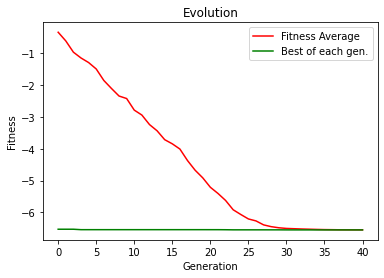

Melhor solução encontrada: [ 0.22811303 -1.62528771]

Fitness: -6.5511320304263085

CPU times: user 312 ms, sys: 8.05 ms, total: 320 ms
Wall time: 311 ms


In [11]:
%%time

differential_evolution(N=100, n=2, low=-3, high=3, C=0.6, F=0.7, function='p', num_iter=40)

### Função objetivo: Rastrigin

(1, 2, 100)


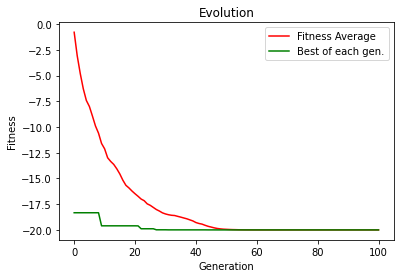

Melhor solução encontrada: [ 2.21121812e-08 -1.36320553e-07]

Fitness: -19.99999999999622

CPU times: user 988 ms, sys: 3.54 ms, total: 992 ms
Wall time: 986 ms


In [18]:
%%time

differential_evolution(N=100, n=2, low=-2, high=2, C=0.9, F=0.9, function='r', num_iter=100)